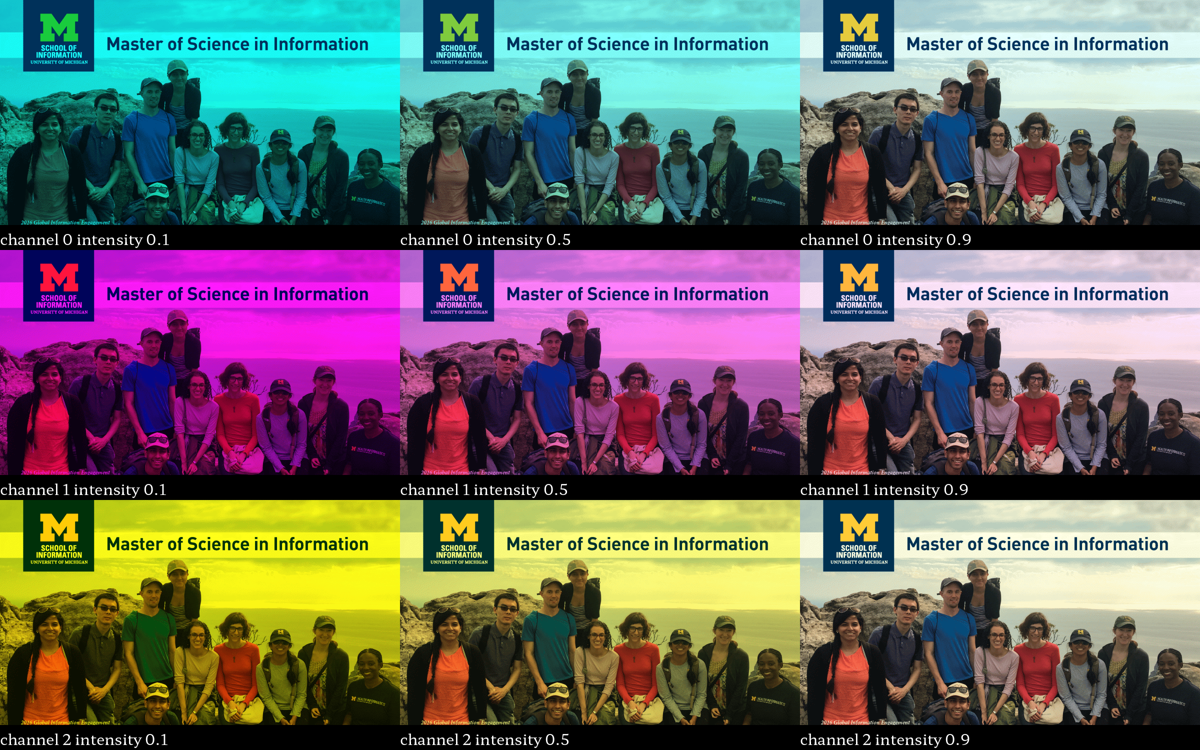

In [1]:
import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw


image_location = "./assignment.png"
font_location = "./Hahmlet.ttf"

image = Image.open(image_location)
image = image.convert('RGB')

images = []
lables = []
for i in range(3):
    for j in (0.1, 0.5, 0.9):
        source = image.split()
        reduce_hannel = source[i].point(lambda x:x*j)
        source[i].paste(reduce_hannel)
        merged_image = Image.merge(image.mode, source)
        lables.append('channel {} intensity {}'.format(i,j))
        images.append(merged_image)
    
# size of orginal image is ==> (800, 450)
# and size of 3*3 contact_sheet most be (2400, 1350)/2
# contact_sheet with black piece is (1200, 750)*2 = (2400, 1500)
# black piece is 1500-1350=150 pixel that 50 pixel under each image
first_image = images[0]
contact_sheet = PIL.Image.new(first_image.mode, (first_image.width*3, first_image.height*3 + 150))
image_font = ImageFont.truetype(font_location,30)
contact_draw = ImageDraw.Draw(contact_sheet)

x = 0
y = 0

for i, img in enumerate(images):
    contact_sheet.paste(img, (x, y))
    contact_draw.text((x, y + first_image.height + 5), lables[i], font = image_font)
    if x + first_image.width == contact_sheet.width:
        x = 0
        y += first_image.height + 50
    else :
        x += first_image.width

contact_sheet = contact_sheet.resize( ( int(contact_sheet.width/2), int(contact_sheet.height/2) ) )
display(contact_sheet)
